<a href="https://colab.research.google.com/github/arkamrit/solar_power_consumption_pridiction/blob/main/solar_power_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # module for plotting
import numpy.linalg as lin # module for performing linear algebra operations
from __future__ import division
from math import log10,exp
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split # to s
import requests
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operation
import matplotlib
from datetime import date
import holidays
#linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
#LSTM
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM, Activation
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model


In [2]:
#Daily consumption
raw_data = pd.read_excel("SolarGeneration_Data .xlsx",sheet_name= 2)
raw_data.head(10)

,TIMESTAMP,Solar_Power_Consumption(Kw)
0,2019-05-14 12:10:00.000,32.055000
1,2019-05-14 12:09:00.007,26.976000
2,2019-05-14 12:08:00.003,31.302999
3,2019-05-14 12:07:00.940,37.044998
4,2019-05-14 12:06:00.737,38.083000
5,2019-05-14 12:05:00.530,38.153999
6,2019-05-14 12:04:00.270,38.240002
7,2019-05-14 12:03:00.020,38.162998
8,2019-05-14 12:02:00.800,38.304001
9,2019-05-14 12:01:00.550,38.443001


In [3]:
raw_data['TimeReviewed'] = pd.to_datetime(raw_data['TIMESTAMP'])
raw_data = raw_data.set_index('TimeReviewed')
raw_data.drop(['TIMESTAMP'], axis=1, inplace=True)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 292646 entries, 2019-05-14 12:10:00 to 2017-12-26 06:38:00.003000
Data columns (total 1 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Solar_Power_Consumption(Kw)  292646 non-null  float64
dtypes: float64(1)
memory usage: 4.5 MB


In [4]:
energydaily = raw_data.resample('D').sum()
energydaily.rename(columns = {"Solar_Power_Consumption(Kw)": "Solar_Power_Consumption(Kwh)"})


,Solar_Power_Consumption(Kwh)
TimeReviewed,
2017-12-26,12782.411988
2017-12-27,13883.010020
2017-12-28,13766.083029
2017-12-29,12904.092990
2017-12-30,7985.972000
...,...
2019-05-10,15619.215017
2019-05-11,9179.519970
2019-05-12,0.000000


<Figure size 640x480 with 0 Axes>

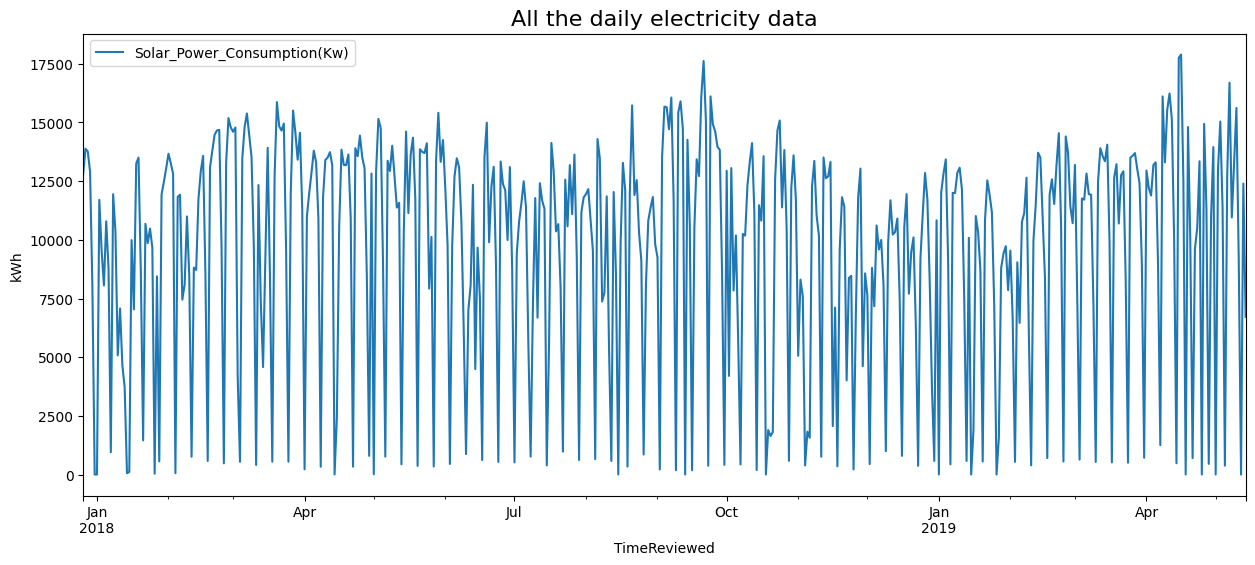

<Figure size 640x480 with 0 Axes>

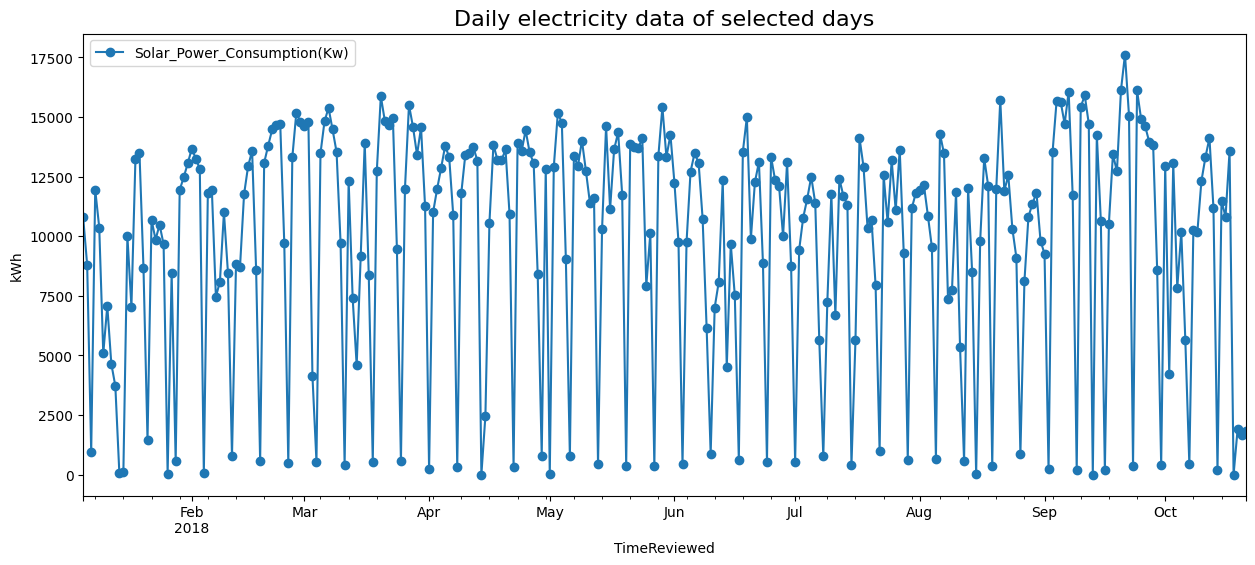

In [5]:
plt.figure()
fig = energydaily.plot(figsize = (15, 6))
plt.title('All the daily electricity data', fontsize = 16)
plt.ylabel('kWh')
plt.show()

plt.figure()
fig = energydaily.iloc[10:300,:].plot(marker = 'o', figsize = (15, 6))
plt.title('Daily electricity data of selected days', fontsize = 16)
plt.ylabel('kWh')
plt.show()

In [6]:
energyhourly = raw_data.resample('H').sum()
energyhourly.rename(columns = {"Solar_Power_Consumption(Kw)": "Solar_Power_Consumption(Kwh)"})

<ipython-input-6-7ce392626319>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  energyhourly = raw_data.resample('H').sum()


,Solar_Power_Consumption(Kwh)
TimeReviewed,
2017-12-26 06:00:00,12.267000
2017-12-26 07:00:00,259.792000
2017-12-26 08:00:00,763.362001
2017-12-26 09:00:00,1375.903006
2017-12-26 10:00:00,1719.122997
...,...
2019-05-14 08:00:00,650.538997
2019-05-14 09:00:00,1390.019003
2019-05-14 10:00:00,1739.818999


<Figure size 640x480 with 0 Axes>

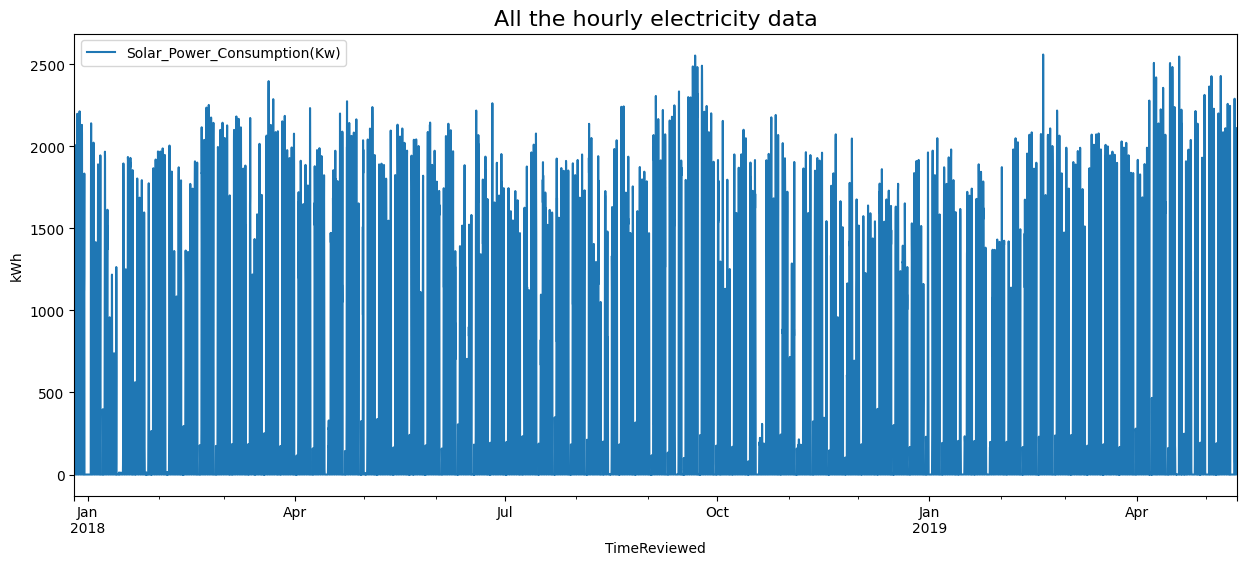

<Figure size 640x480 with 0 Axes>

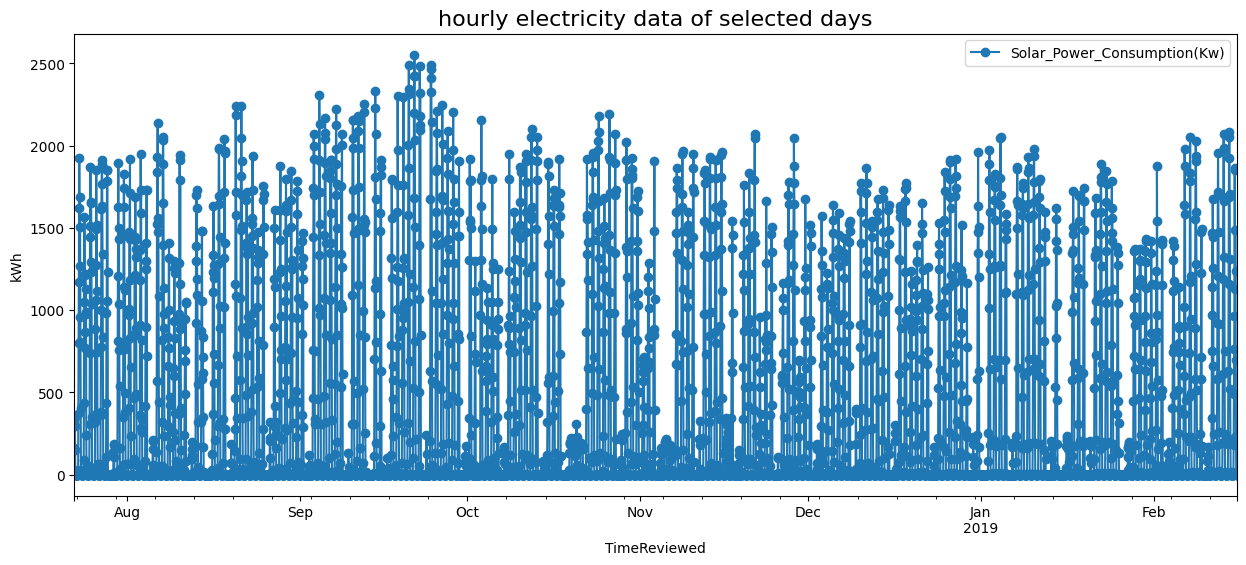

In [7]:
plt.figure()
fig = energyhourly.plot(figsize = (15, 6))
plt.title('All the hourly electricity data', fontsize = 16)
plt.ylabel('kWh')
plt.show()

plt.figure()
fig = energyhourly.iloc[5000:10000,:].plot(marker = 'o', figsize = (15, 6))
plt.title('hourly electricity data of selected days', fontsize = 16)
plt.ylabel('kWh')
plt.show()

<ipython-input-8-668b61f7fb9d>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  energyhourly['Solar_Power_Consumption(Kw)'].resample('M').mean().plot(kind='bar')


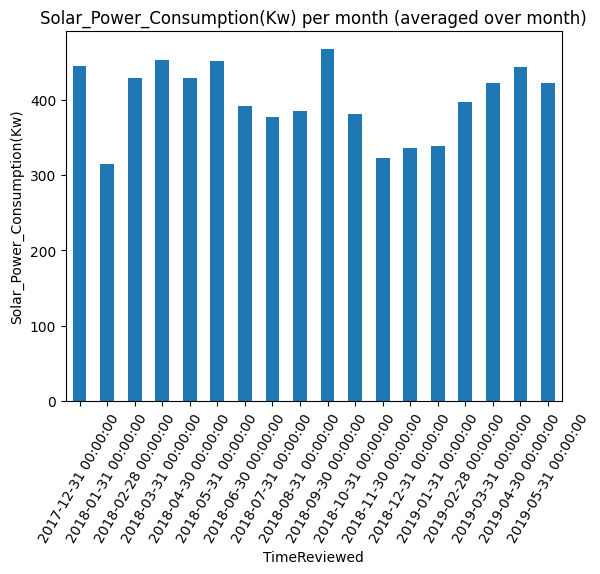

In [8]:
energyhourly['Solar_Power_Consumption(Kw)'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Solar_Power_Consumption(Kw)')
plt.title('Solar_Power_Consumption(Kw) per month (averaged over month)')
plt.show()

<ipython-input-9-05e51f0cca0d>:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  energyhourly['Solar_Power_Consumption(Kw)'].resample('Q').mean().plot(kind='bar')


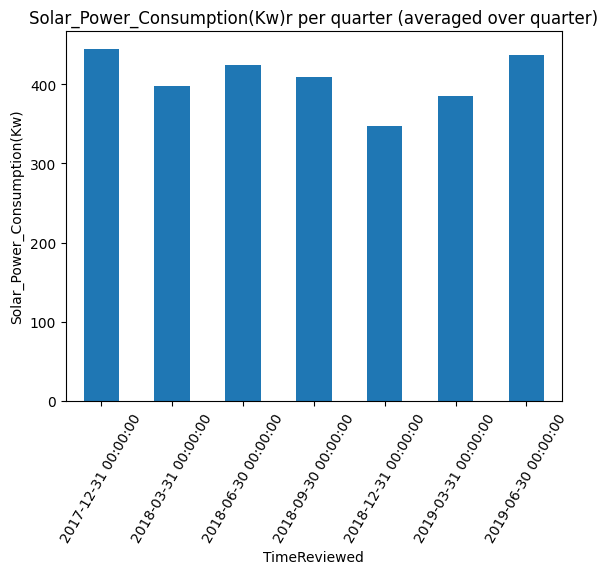

In [9]:
energyhourly['Solar_Power_Consumption(Kw)'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Solar_Power_Consumption(Kw)')
plt.title('Solar_Power_Consumption(Kw)r per quarter (averaged over quarter)')
plt.show()


In [10]:
weather_data= pd.read_excel("SolarGeneration_Data .xlsx",sheet_name=3)
weather_data.rename(columns = {"Value": "Temp(C)"})

,TimeStamp,Temp( C)
0,2019-05-14 12:00:00.063,26
1,2019-05-14 11:45:00.023,26
2,2019-05-14 11:30:00.033,26
3,2019-05-14 11:15:00.027,26
4,2019-05-14 11:00:00.067,26
...,...,...
47773,2017-12-26 01:00:00.033,26
47774,2017-12-26 00:45:00.020,26
47775,2017-12-26 00:30:00.017,26
47776,2017-12-26 00:15:00.033,26


In [11]:
weather_data['TimeReviewed'] = pd.to_datetime(weather_data['TimeStamp'])
weather_data = weather_data.set_index('TimeReviewed')
weather_data.drop(['TimeStamp'], axis=1, inplace=True)
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47778 entries, 2019-05-14 12:00:00.063000 to 2017-12-26 00:00:00.047000
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Temp( C)  47778 non-null  int64
dtypes: int64(1)
memory usage: 746.5 KB


In [12]:
weatherhourly = weather_data.resample('H').mean()
weatherhourly

<ipython-input-12-59b9ca369964>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weatherhourly = weather_data.resample('H').mean()


,Temp( C)
TimeReviewed,
2017-12-26 00:00:00,26.0
2017-12-26 01:00:00,26.0
2017-12-26 02:00:00,26.0
2017-12-26 03:00:00,26.0
2017-12-26 04:00:00,26.0
...,...
2019-05-14 08:00:00,28.0
2019-05-14 09:00:00,28.0
2019-05-14 10:00:00,28.0


<Figure size 640x480 with 0 Axes>

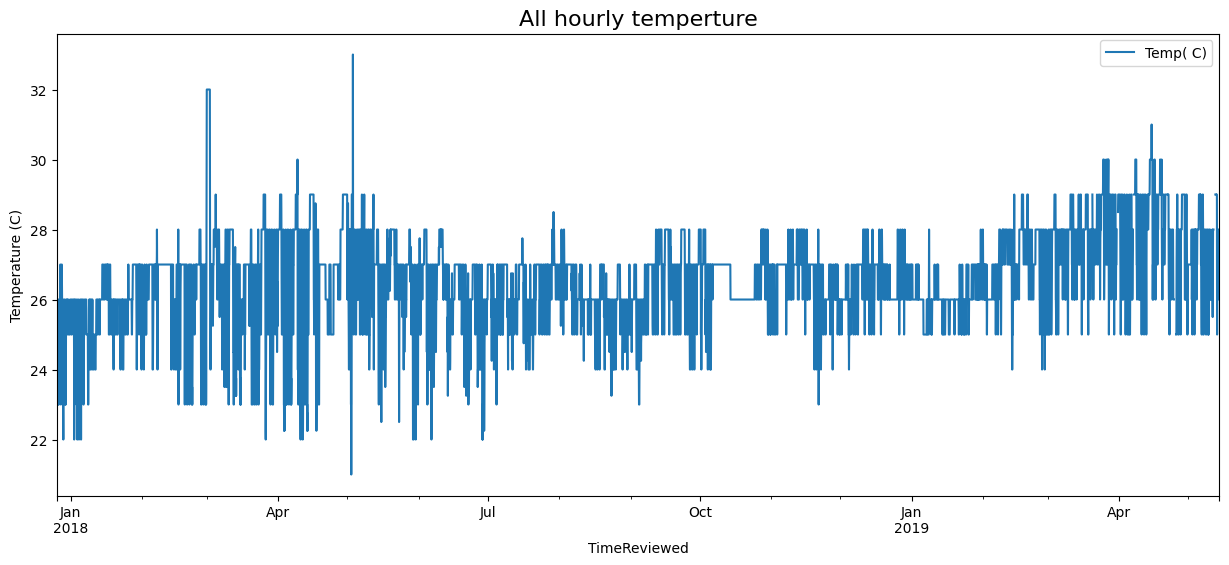

<Figure size 640x480 with 0 Axes>

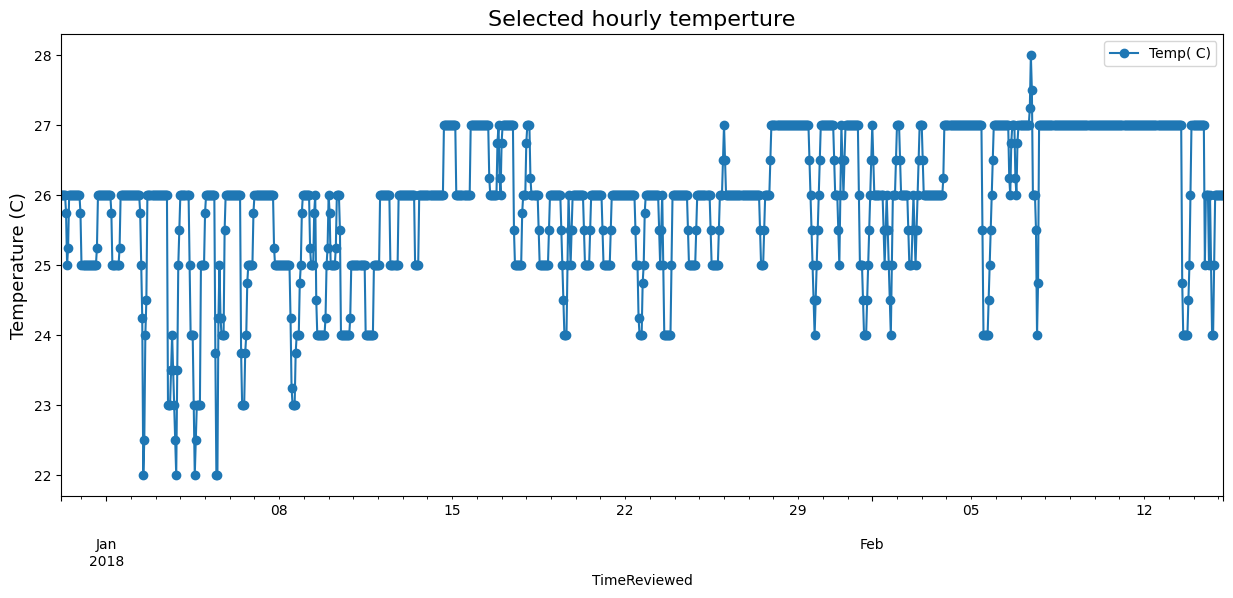

In [13]:
plt.figure()
fig = weatherhourly.plot(y = 'Temp( C)', figsize = (15, 6))
plt.title('All hourly temperture', fontsize = 16)
plt.ylabel(r'Temperature (C)')
plt.show()


plt.figure()
fig = weatherhourly.iloc[100:1230].plot(y = 'Temp( C)', figsize = (15, 6), marker = 'o')
plt.title('Selected hourly temperture',fontsize = 16)
plt.ylabel(r'Temperature (C)',fontsize = 13)
plt.show()


In [14]:
weatherdaily = weather_data.resample('D').mean()
weatherdaily

,Temp( C)
TimeReviewed,
2017-12-26,25.000000
2017-12-27,25.375000
2017-12-28,24.833333
2017-12-29,24.833333
2017-12-30,25.906250
...,...
2019-05-10,27.041667
2019-05-11,26.662921
2019-05-12,29.000000


<Figure size 640x480 with 0 Axes>

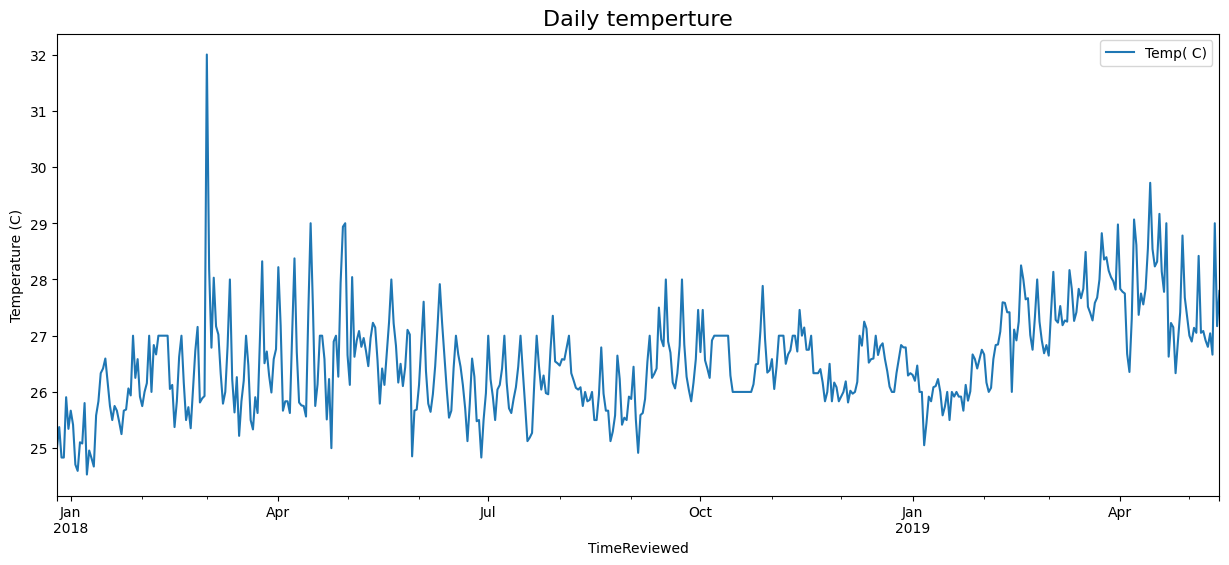

<Figure size 640x480 with 0 Axes>

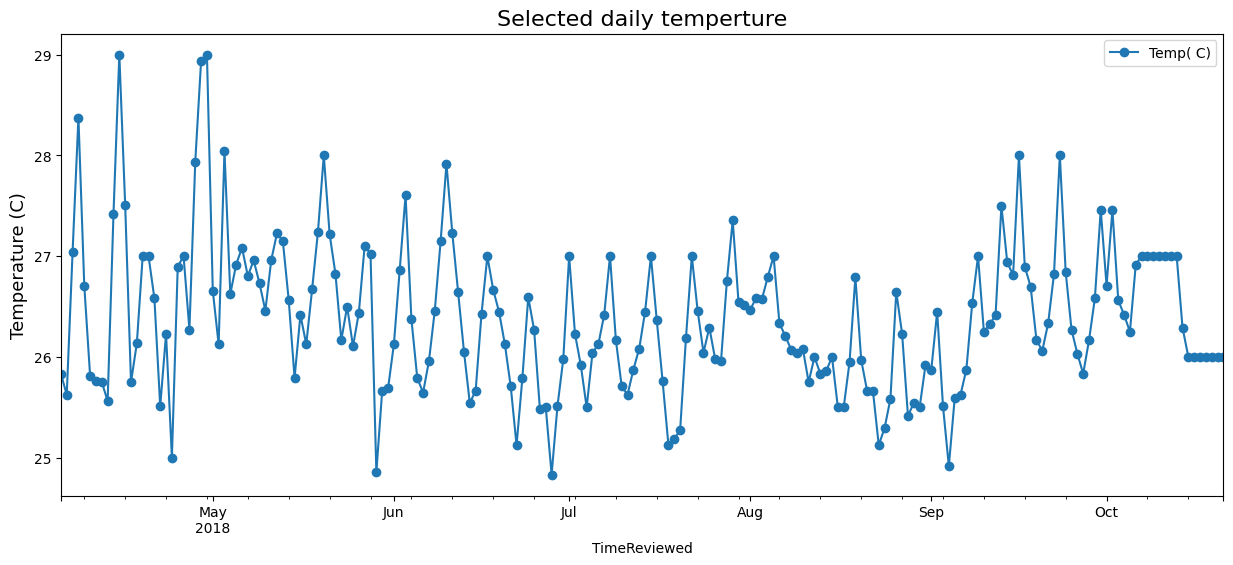

In [15]:
plt.figure()
fig = weatherdaily.plot(y = 'Temp( C)', figsize = (15, 6))
plt.title('Daily temperture', fontsize = 16)
plt.ylabel(r'Temperature (C)')
plt.show()


plt.figure()
fig = weatherdaily.iloc[100:300].plot(y = 'Temp( C)', figsize = (15, 6), marker = 'o')
plt.title('Selected daily temperture',fontsize = 16)
plt.ylabel(r'Temperature (C)',fontsize = 13)
plt.show()

<ipython-input-16-c9e8f830bbef>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  weatherhourly['Temp( C)'].resample('M').mean().plot(kind='bar')


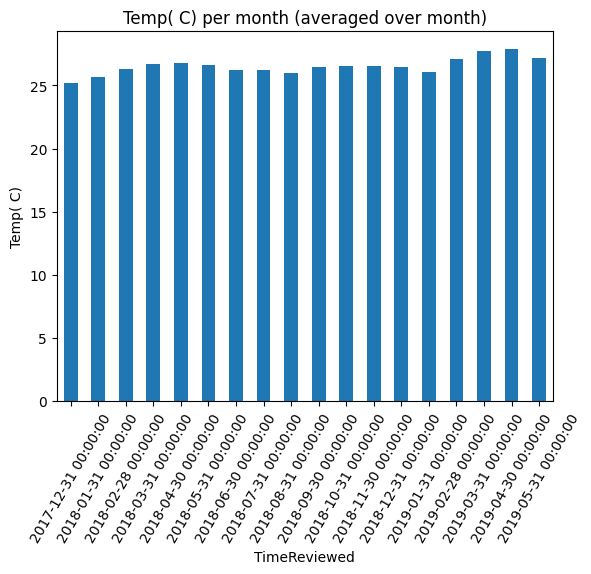

In [16]:
weatherhourly['Temp( C)'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Temp( C)')
plt.title('Temp( C) per month (averaged over month)')
plt.show()

<ipython-input-17-67f8cd0b8391>:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  weatherhourly['Temp( C)'].resample('Q').mean().plot(kind='bar')


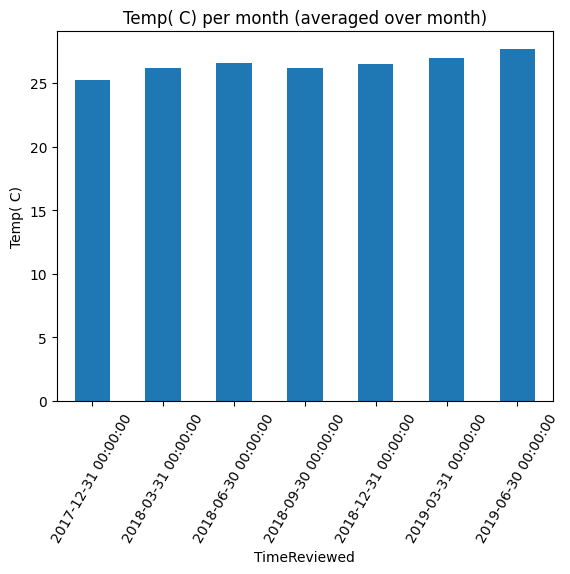

In [17]:
weatherhourly['Temp( C)'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Temp( C)')
plt.title('Temp( C) per month (averaged over month)')
plt.show()


In [18]:
employee= pd.read_excel("SolarGeneration_Data .xlsx",sheet_name=5)
employee_data = pd.DataFrame(data=employee,columns=['DATE','EmployeeCount'])
employee_data.head(10)

,DATE,EmployeeCount
0,2019-05-14,103
1,2019-05-14,90
2,2019-05-13,100
3,2019-05-13,86
4,2019-05-12,11
5,2019-05-11,88
6,2019-05-11,78
7,2019-05-10,92
8,2019-05-10,92
9,2019-05-09,99


In [19]:
employee_data['TimeReviewed'] = pd.to_datetime(employee_data['DATE'])
employee_data = employee_data.set_index('TimeReviewed')
employee_data.drop(['DATE'], axis=1, inplace=True)
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 972 entries, 2019-05-14 to 2017-12-26
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   EmployeeCount  972 non-null    int64
dtypes: int64(1)
memory usage: 15.2 KB


In [20]:
empdaily = employee_data.resample('D').sum()
empdaily

,EmployeeCount
TimeReviewed,
2017-12-26,121
2017-12-27,0
2017-12-28,0
2017-12-29,0
2017-12-30,0
...,...
2019-05-10,184
2019-05-11,166
2019-05-12,11


<Figure size 640x480 with 0 Axes>

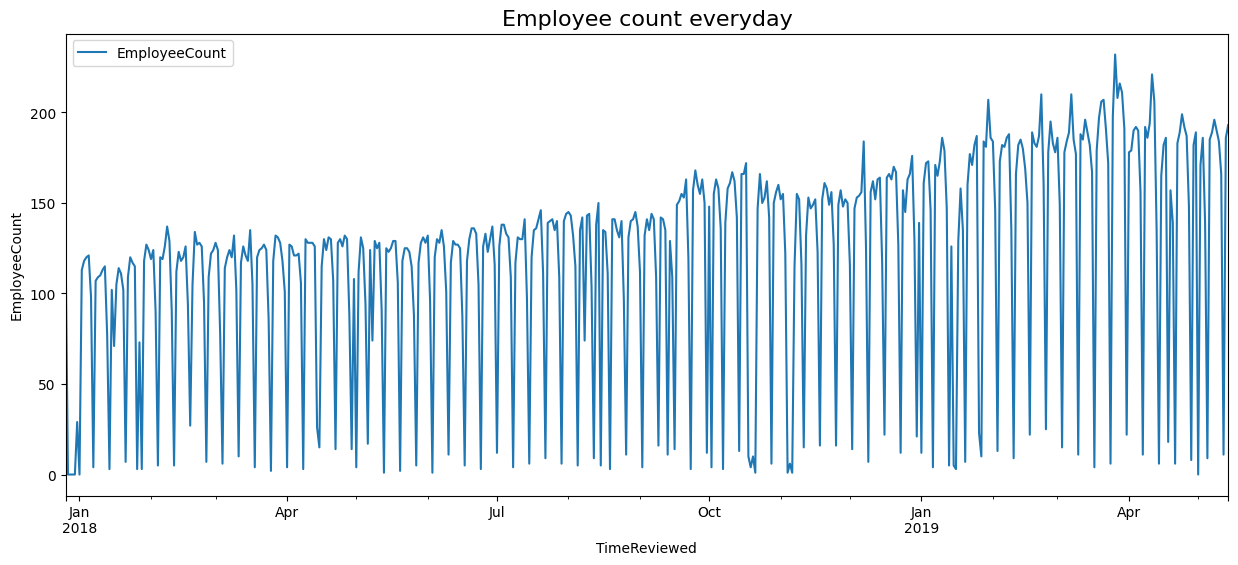

<Figure size 640x480 with 0 Axes>

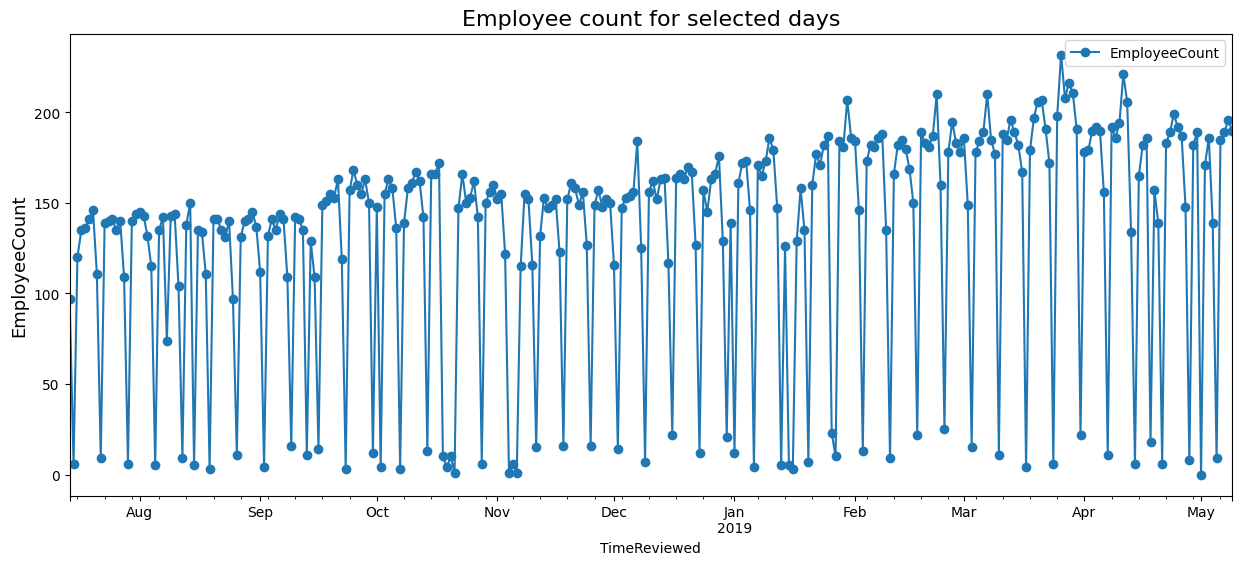

In [21]:
plt.figure()
fig = empdaily.plot(y = 'EmployeeCount', figsize = (15, 6))
plt.title('Employee count everyday', fontsize = 16)
plt.ylabel(r'EmployeeCount')
plt.show()


plt.figure()
fig = empdaily.iloc[200:500].plot(y = 'EmployeeCount', figsize = (15, 6), marker = 'o')
plt.title('Employee count for selected days',fontsize = 16)
plt.ylabel(r'EmployeeCount',fontsize = 13)
plt.show()

In [22]:
dailyEnergyWithFeatures = energydaily.join(weatherdaily, how = 'inner')
dailyEnergyWithFeatures = dailyEnergyWithFeatures.join(empdaily, how = 'inner')
dailyEnergyWithFeatures.dropna(axis=0, how='any', inplace = True)
dailyEnergyWithFeatures.to_excel('dailyEnergyWithFeatures.xlsx')
dailyEnergyWithFeatures.head(10)

,Solar_Power_Consumption(Kw),Temp( C),EmployeeCount
TimeReviewed,,,
2017-12-26,12782.411988,25.000000,121
2017-12-27,13883.010020,25.375000,0
2017-12-28,13766.083029,24.833333,0
2017-12-29,12904.092990,24.833333,0
2017-12-30,7985.972000,25.906250,0
2017-12-31,0.000000,25.343750,29
2018-01-01,0.000000,25.666667,0
2018-01-02,11703.730007,25.416667,113
2018-01-03,9560.972003,24.708333,118


In [23]:
dailyEnergyWithFeatures.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2017-12-26 to 2019-05-14
Freq: D
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Solar_Power_Consumption(Kw)  505 non-null    float64
 1   Temp( C)                     505 non-null    float64
 2   EmployeeCount                505 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 15.8 KB


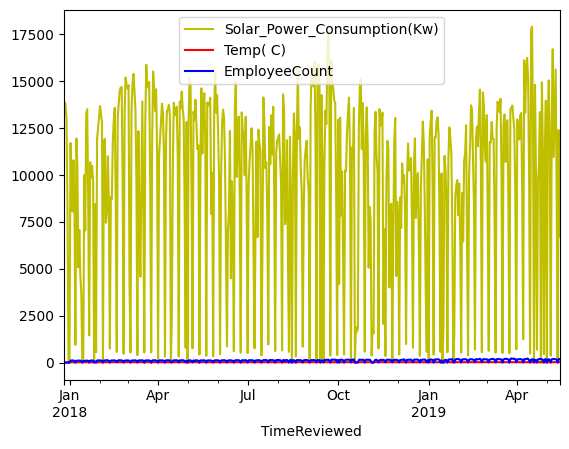

In [24]:


plt.figure()
## resampling over week and computing mean
#dailyEnergyWithFeatures[dailyEnergyWithFeatures[['TimeReviewed']] .notnull()].set_index('TimeReviewed').resample('W')
fig = dailyEnergyWithFeatures['Solar_Power_Consumption(Kw)'].plot(color='y', legend=True)
dailyEnergyWithFeatures['Temp( C)'].plot(color='r', legend=True)
dailyEnergyWithFeatures['EmployeeCount'].plot(color='b', legend=True)
plt.show()

In [25]:
dailyEnergyWithFeatures = pd.read_excel('dailyEnergyWithFeatures.xlsx')

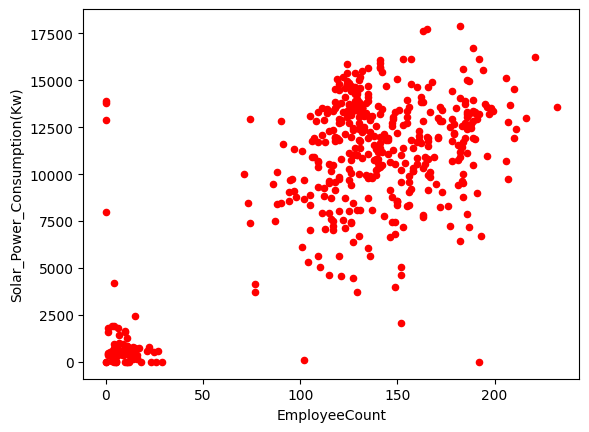

In [26]:
dailyEnergyWithFeatures.plot(kind='scatter',x='EmployeeCount',y='Solar_Power_Consumption(Kw)',color='red')
plt.show()

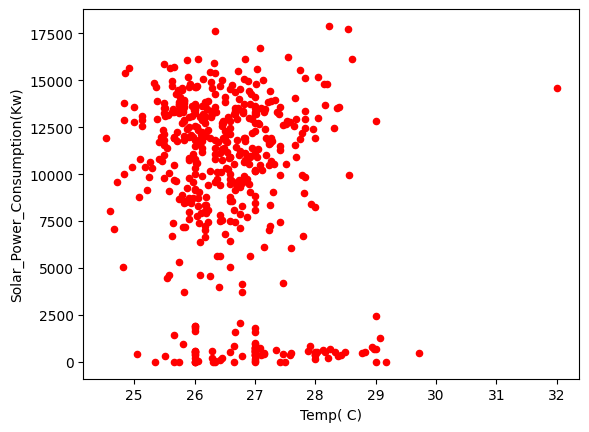

In [27]:
dailyEnergyWithFeatures.plot(kind='scatter',x='Temp( C)',y='Solar_Power_Consumption(Kw)',color='red')
plt.show()

In [28]:
for date, name in sorted(holidays.IND(state='TN', years=2018).items()):
  print(date, name)

2018-01-14 Makar Sankranti / Pongal
2018-01-26 Republic Day
2018-03-02 Holi
2018-03-25 Palm Sunday
2018-03-30 Good Friday
2018-04-01 Easter Sunday
2018-04-14 Dr. B. R. Ambedkar's Jayanti; Puthandu (Tamil New Year)
2018-04-15 Puthandu (Tamil New Year)
2018-05-01 Labour Day
2018-05-20 Feast of Pentecost
2018-06-15 Eid ul-Fitr (estimated)
2018-06-16 Eid ul-Fitr (estimated)
2018-08-15 Independence Day
2018-08-21 Eid al-Adha (estimated)
2018-08-22 Eid al-Adha (estimated)
2018-09-20 Day of Ashura (estimated)
2018-10-02 Gandhi Jayanti
2018-11-07 Diwali
2018-11-20 Mawlid (estimated)
2018-12-25 Christmas Day


In [29]:
dailyEnergy = pd.read_excel('dailyEnergyWithFeatures.xlsx')
dailyEnergy['weekday'] = dailyEnergy['TimeReviewed'].dt.dayofweek
dailyEnergy['day_type'] = np.zeros(len(dailyEnergy))
dailyEnergy['day_type'][(dailyEnergy['weekday']==5)|(dailyEnergy['weekday']==6)|(dailyEnergy['TimeReviewed']=='2017-12-26')|(dailyEnergy['TimeReviewed']=='2018-1-1')|(dailyEnergy['TimeReviewed']=='2018-1-14')|(dailyEnergy['TimeReviewed']=='2018-1-26')|(dailyEnergy['TimeReviewed']=='2018-5-1')|(dailyEnergy['TimeReviewed']=='2018-8-15')|(dailyEnergy['TimeReviewed']=='2018-10-2')|(dailyEnergy['TimeReviewed']=='2018-12-25')|(dailyEnergy['TimeReviewed']=='2019-1-1')|(dailyEnergy['TimeReviewed']=='2019-1-14')|(dailyEnergy['TimeReviewed']=='2019-1-26')|(dailyEnergy['TimeReviewed']=='2019-5-1')]=1
dailyEnergy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   TimeReviewed                 505 non-null    datetime64[ns]
 1   Solar_Power_Consumption(Kw)  505 non-null    float64       
 2   Temp( C)                     505 non-null    float64       
 3   EmployeeCount                505 non-null    int64         
 4   weekday                      505 non-null    int32         
 5   day_type                     505 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1)
memory usage: 21.8 KB


<ipython-input-29-8a3382f11a55>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dailyEnergy['day_type'][(dailyEnergy['weekday']==5)|(dailyEnergy['weekday']==6)|(dailyEnergy['TimeReviewed']=='2017-12-26')|(dailyEnergy['TimeReviewed']=='2018-

In [30]:
# Linear Regression
df_elect = dailyEnergy[["Temp( C)", "EmployeeCount", "weekday","day_type", 'Solar_Power_Consumption(Kw)']]

elect_train = pd.DataFrame(data=df_elect.head(350))
elect_test = pd.DataFrame(data=df_elect.head(155))

XX_elect_train = elect_train.drop('Solar_Power_Consumption(Kw)', axis = 1).reset_index().drop('index', axis = 1)
XX_elect_test = elect_test.drop('Solar_Power_Consumption(Kw)', axis = 1).reset_index().drop('index', axis = 1)

YY_elect_train = elect_train[['Solar_Power_Consumption(Kw)']]
YY_elect_test = elect_test[['Solar_Power_Consumption(Kw)']]


print(XX_elect_train.shape, YY_elect_train.shape, XX_elect_test.shape, YY_elect_test.shape)
lr_elect = LinearRegression()
lr_elect.fit(XX_elect_train,YY_elect_train)

y_lr = lr_elect.predict(XX_elect_test)

print ("The test score R2: ", lr_elect.score(XX_elect_test, YY_elect_test))


(350, 4) (350, 1) (155, 4) (155, 1)
The test score R2:  0.6370849327485767


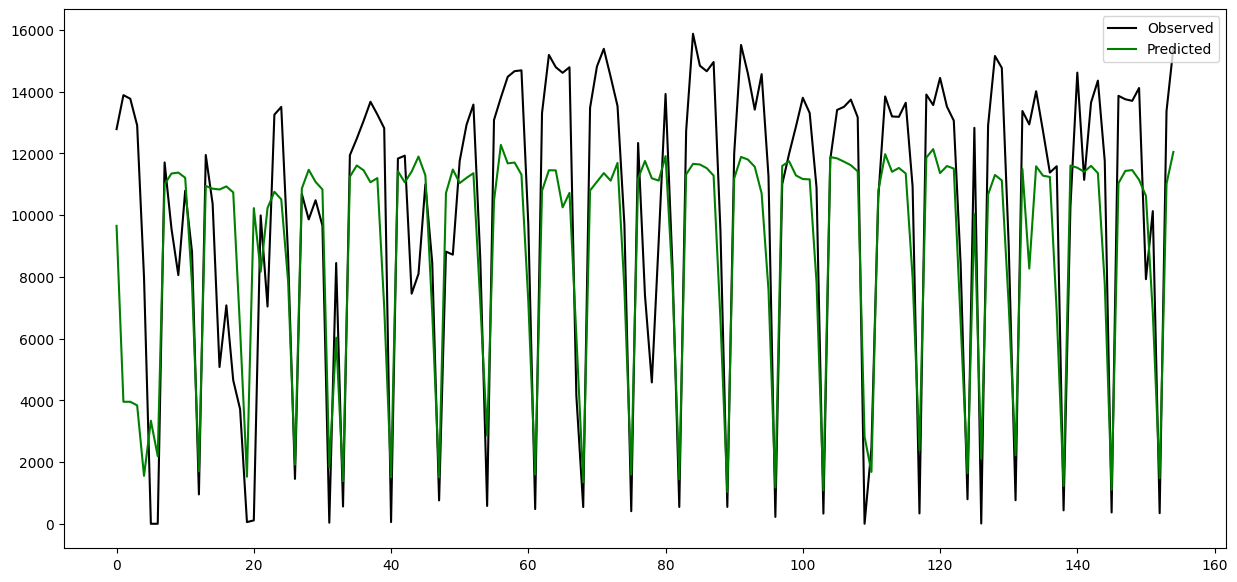

In [31]:
fig = plt.figure(figsize=(15,7))
plt.plot(XX_elect_test.index, YY_elect_test, label='Observed', color='k')
plt.plot(XX_elect_test.index, y_lr, label='Predicted', color='g')
plt.legend(loc='upper right')

Text(0, 0.5, 'Predicted Elec. Usage (kWh)')

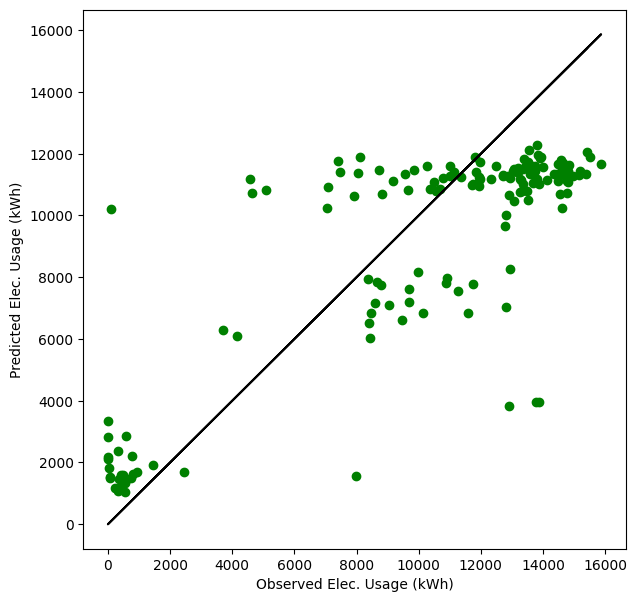

In [32]:
fig = plt.figure(figsize=(7,7))
plt.plot(YY_elect_test, YY_elect_test, c='k')
plt.scatter(YY_elect_test, y_lr, c='g')
plt.xlabel('Observed Elec. Usage (kWh)')
plt.ylabel("Predicted Elec. Usage (kWh)")

In [33]:


energy=pd.read_excel('dailyEnergyWithFeatures.xlsx')
# save to file

energy['weekday'] = energy['TimeReviewed'].dt.dayofweek
energy['day_type'] = np.zeros(len(energy))
energy['day_type'][(energy['weekday']==5)|(energy['weekday']==6)|(energy['TimeReviewed']=='2017-12-26')|(energy['TimeReviewed']=='2018-1-1')|(energy['TimeReviewed']=='2018-1-14')|(energy['TimeReviewed']=='2018-1-26')|(energy['TimeReviewed']=='2018-5-1')|(energy['TimeReviewed']=='2018-8-15')|(energy['TimeReviewed']=='2018-10-2')|(energy['TimeReviewed']=='2018-12-25')|(energy['TimeReviewed']=='2019-1-1')|(energy['TimeReviewed']=='2019-1-14')|(energy['TimeReviewed']=='2019-1-26')|(energy['TimeReviewed']=='2019-5-1')]=1

energy.to_excel('energy.xlsx')
energy

<ipython-input-33-d4f620c2d366>:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  energy['day_type'][(energy['weekday']==5)|(energy['weekday']==6)|(energy['TimeReviewed']=='2017-12-26')|(energy['TimeReviewed']=='2018-1-1')|(energy['TimeReview

,TimeReviewed,Solar_Power_Consumption(Kw),Temp( C),EmployeeCount,weekday,day_type
0,2017-12-26,12782.411988,25.000000,121,1,1.0
1,2017-12-27,13883.010020,25.375000,0,2,0.0
2,2017-12-28,13766.083029,24.833333,0,3,0.0
3,2017-12-29,12904.092990,24.833333,0,4,0.0
4,2017-12-30,7985.972000,25.906250,0,5,1.0
...,...,...,...,...,...,...
500,2019-05-10,15619.215017,27.041667,184,4,0.0
501,2019-05-11,9179.519970,26.662921,166,5,1.0
502,2019-05-12,0.000000,29.000000,11,6,1.0
503,2019-05-13,12396.665989,27.169492,186,0,0.0


In [34]:


def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):

	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
dataset = pd.read_excel('energy.xlsx', header=0, index_col=0)
values = dataset[['Solar_Power_Consumption(Kw)','Temp( C)','EmployeeCount','weekday','day_type']].values
len(values)
#values = values.reshape((len(values), 7))
# ensure all data is float
#values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
#drop the values you dont want to predict
#reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)
print(reframed.head())

reframed

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)   var2(t)  \
1   0.714262   0.062762   0.521552   0.166667        1.0  0.775761  0.112971   
2   0.775761   0.112971   0.000000   0.333333        0.0  0.769228  0.040446   
3   0.769228   0.040446   0.000000   0.500000        0.0  0.721061  0.040446   
4   0.721061   0.040446   0.000000   0.666667        0.0  0.446244  0.184100   
5   0.446244   0.184100   0.000000   0.833333        1.0  0.000000  0.108787   

   var3(t)   var4(t)  var5(t)  
1    0.000  0.333333      0.0  
2    0.000  0.500000      0.0  
3    0.000  0.666667      0.0  
4    0.000  0.833333      1.0  
5    0.125  1.000000      1.0  


,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
1,0.714262,0.062762,0.521552,0.166667,1.0,0.775761,0.112971,0.000000,0.333333,0.0
2,0.775761,0.112971,0.000000,0.333333,0.0,0.769228,0.040446,0.000000,0.500000,0.0
3,0.769228,0.040446,0.000000,0.500000,0.0,0.721061,0.040446,0.000000,0.666667,0.0
4,0.721061,0.040446,0.000000,0.666667,0.0,0.446244,0.184100,0.000000,0.833333,1.0
5,0.446244,0.184100,0.000000,0.833333,1.0,0.000000,0.108787,0.125000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...
500,0.739638,0.304045,0.818966,0.500000,0.0,0.872778,0.336123,0.793103,0.666667,0.0
501,0.872778,0.336123,0.793103,0.666667,0.0,0.512937,0.285412,0.715517,0.833333,1.0
502,0.512937,0.285412,0.715517,0.833333,1.0,0.000000,0.598326,0.047414,1.000000,1.0
503,0.000000,0.598326,0.047414,1.000000,1.0,0.692707,0.353237,0.801724,0.000000,0.0


In [35]:
values = reframed.values

n_train_time = 365 #training size is taken for 1 year (2017/26/12 to 2018/26/12)
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(365, 1, 9) (365,) (139, 1, 9) (139,)


In [36]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 - 3s - 528ms/step - accuracy: 0.6986 - loss: 0.2944 - val_accuracy: 0.6906 - val_loss: 0.2575
Epoch 2/20
6/6 - 1s - 118ms/step - accuracy: 0.6986 - loss: 0.2347 - val_accuracy: 0.6906 - val_loss: 0.2137
Epoch 3/20
6/6 - 0s - 24ms/step - accuracy: 0.6986 - loss: 0.2021 - val_accuracy: 0.6906 - val_loss: 0.1913
Epoch 4/20
6/6 - 0s - 22ms/step - accuracy: 0.6986 - loss: 0.1825 - val_accuracy: 0.6906 - val_loss: 0.1790
Epoch 5/20
6/6 - 0s - 24ms/step - accuracy: 0.7288 - loss: 0.1684 - val_accuracy: 0.7914 - val_loss: 0.1672
Epoch 6/20
6/6 - 0s - 22ms/step - accuracy: 0.8055 - loss: 0.1565 - val_accuracy: 0.8273 - val_loss: 0.1532
Epoch 7/20
6/6 - 0s - 16ms/step - accuracy: 0.8247 - loss: 0.1461 - val_accuracy: 0.8345 - val_loss: 0.1383
Epoch 8/20
6/6 - 0s - 26ms/step - accuracy: 0.8356 - loss: 0.1326 - val_accuracy: 0.8345 - val_loss: 0.1246
Epoch 9/20
6/6 - 0s - 16ms/step - accuracy: 0.8329 - loss: 0.1206 - val_accuracy: 0.8345 - val_loss: 0.1125
Epoch 10/20
6/6 - 0s - 24ms/step - ac

In [37]:
score = model.evaluate(test_X, test_y, batch_size=70, verbose=1)

print('Test accuracy:', score[1])
print('Accuracy:',score[1]*100)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9761 - loss: 0.0636
Test accuracy: 0.9784172773361206
Accuracy: 97.84172773361206


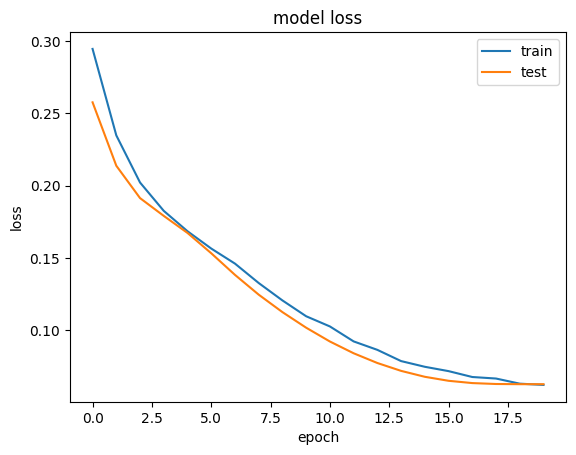

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [39]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0],9))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -4:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Test RMSE: 4482.206


In [40]:
df_result = pd.DataFrame({'Actual': inv_y.flatten(), 'Predicted': inv_yhat.flatten()})
df_result.to_csv('predicted_results.csv', index=False)


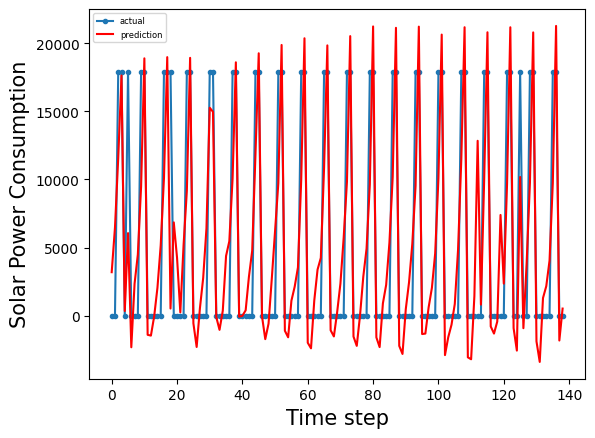

In [41]:
aa=[x for x in range(139)]
plt.plot(aa, inv_y[:139], marker='.', label="actual")
plt.plot(aa, inv_yhat[:139], 'r', label="prediction")
plt.ylabel('Solar Power Consumption', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=6)
plt.show()

In [42]:
from keras.models import load_model

# Save the model
model.save('your_lstm_model.h5')


In [45]:
n = int(input("Enter the day for which the value is to be predicted:"))
change=100*abs(inv_yhat[n]-inv_y[n])/inv_yhat[n]
print("The value of the consumption the next day will be",inv_yhat[n],"and the percentage change is ",change,"%")


Enter the day for which the value is to be predicted:3
The value of the consumption the next day will be 17640.78211290956 and the percentage change is  1.4466528507823486 %


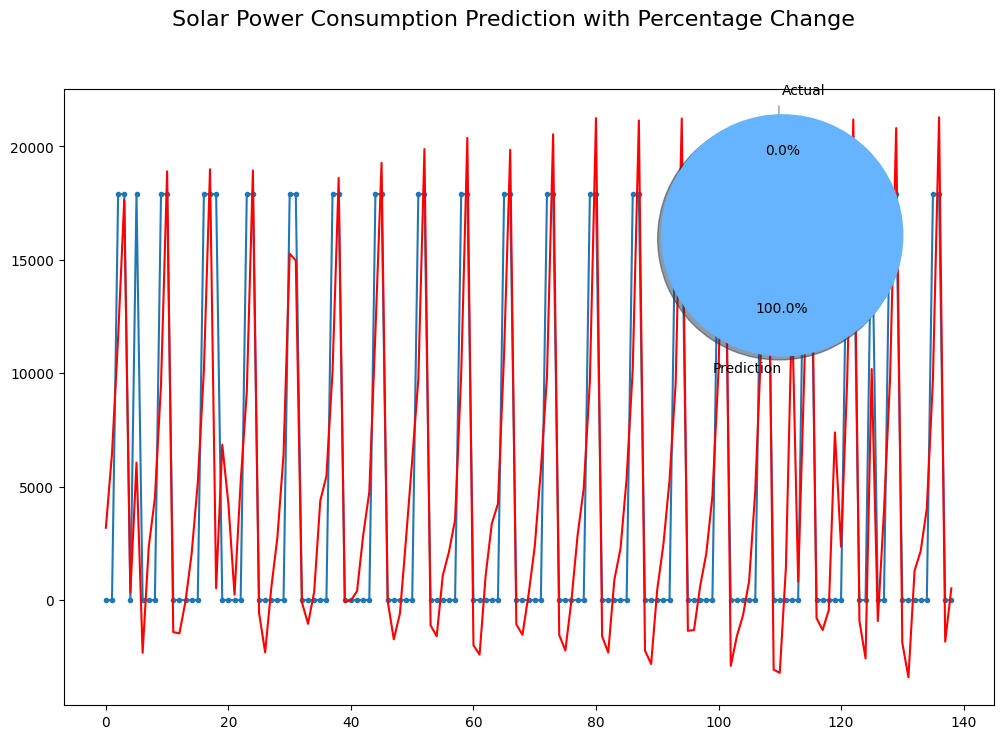

In [44]:
plt.figure(figsize=(12, 8))

# Line plot for actual and predicted consumption
plt.plot(aa, inv_y[:139], marker='.', label="Actual")
plt.plot(aa, inv_yhat[:139], 'r', label="Prediction")

# Pie chart for percentage distribution
plt.subplot(2, 2, 2)
labels = ['Actual', 'Prediction']
sizes = [100 - change, change]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

plt.suptitle('Solar Power Consumption Prediction with Percentage Change', fontsize=16)

plt.show()